## Import Dependencies 

In [6]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model

import cv2
import os

from mtcnn import MTCNN
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

from model import get_model

## Model Summary

In [2]:
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

## Crop Face

In [3]:
def crop_face(filename, required_size=(224, 224)):
    img = cv2.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(img)
    x, y, width, height = results[0]['box']
    face = img[y:y+height, x:x+width]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array, face

## Lets Predict

In [10]:
def who_is_this(img):
    face_array, face = crop_face(img)
    face_array = face_array.astype('float32')
    input_sample = np.expand_dims(face_array, axis=0)
    img_prediction = vgg_face_descriptor.predict(preprocess_input(input_sample))
    results = decode_predictions(img_prediction)
    prediction = results[0][0][0].replace("b'", "").replace("'","")
    
    plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    plt.title(results[0][0][0].replace("b'", "").replace("'",""))

    plt.show()

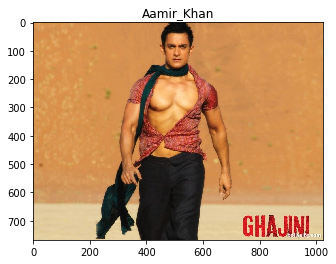

In [11]:
model.load_weights(os.path.join(os.getcwd(), "weight", "vgg_face_weights.h5"))
vgg_face_descriptor = Model(inputs=model.layers[0].input,\
                            outputs=model.layers[-2].output)

test_folder = os.path.join(os.getcwd(), "test")
who_is_this(os.path.join(test_folder, "Amir-Khan.jpg"))